# SciML M2, TP1: interpolation, incertitude et EDP

On se propose ici d'utiliser les approches introduites dans ce cours pour 
interpoler des solutions obtenues par différence finis et étudier un problème d'incertitude.

### Exercice 1: Interpolation

On considère le problème EDP suivant:

$$
\left\{\begin{array}{l}
-\partial_{xx} u =f, \quad x\in ]0,1[\\
u(0)=u(1)=0\end{array}\right.
$$

avec $f(x)$ un membre de droite donné.

Pour résoudre cette équation on se donne un maillage $M=\left\{x_0,....,x_{n+1}\right\}$ de pas $\Delta x$ et on utilise la méthode 
des différences finis. On note $u_i \approx u(x_i)$. Cela donne le schéma suivant

$$
\frac{-u_{i+1}+2u_i-u_{i-1}}{\Delta x^2} =f(x_i), \quad u_0=u_{n+1}=0
$$

Cela revient a résoudre un système $A u=F$ que l'on détaillera dans le code suivant.

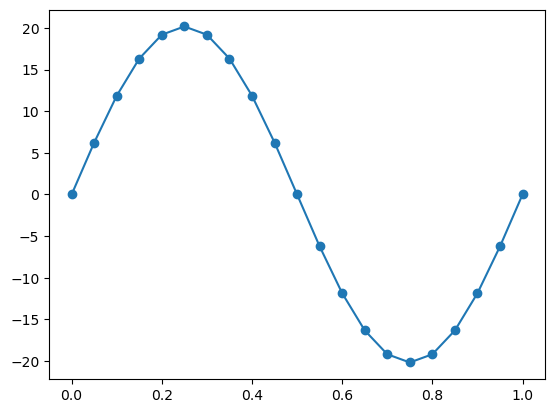

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def solve(N,Mh,vector_f=np.ones(100)):
    dx= 1./N
    A= (2.0/dx)*np.eye(N+1,k=0)-(1.0/dx)*np.eye(N+1,k=-1)-(1.0/dx)*np.eye(N+1,k=1)
    A[0,:]=0.0; A[0,0]=1.0
    A[-1,:]=0.0; A[-1,-1]=1.0
    vector_f[0]=0.0; vector_f[-1]=0.0
    x= np.linalg.solve(A,vector_f)
    return x

N=20
Mh = np.linspace(0,1,N+1)
f=4.0*np.pi**2.0*np.sin(2.0*np.pi*Mh)
x=solve(N,Mh,vector_f=f)

plt.plot(Mh,x)
plt.scatter(Mh,x)


### Exercice 1

- Installez scikit-learn.
- Utilisez les régression polynomiales ou à noyaux (avec plusieurs noyaux) pour interpoler le résultat
sur un maillage de 84 points.
- Validez les résultats obtenus en comparant avec la solution exacte.

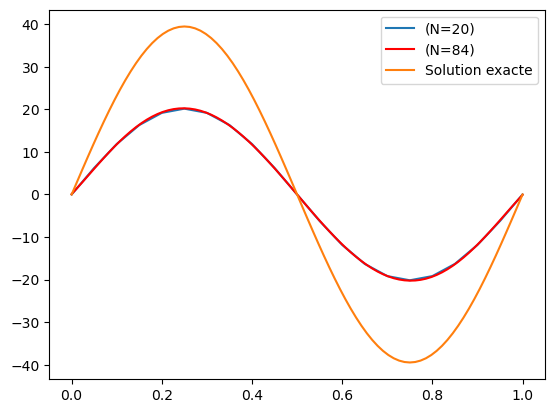

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

Mh2 = np.linspace(0,1,85)

model = Pipeline([('poly', PolynomialFeatures(degree=5)),('linear', LinearRegression(fit_intercept=False))])

model.fit(Mh.reshape(-1, 1), x)

pred = model.predict(Mh2.reshape(-1,1))


exact_solution = 4.0 * np.pi ** 2.0 * np.sin(2.0 * np.pi * Mh2)



plt.plot(Mh, x, label='(N=20)')
plt.plot(Mh2, pred, color='red', label='(N=84)')
plt.plot(Mh2, exact_solution, label='Solution exacte')
plt.legend()
plt.show()

### Exercice 2

Installer pytorch et effectuer la même chose avec un MLP.



Exemple de code perceptron:

'''   
    ## class mlp
    
    class mlp(nn.Module):
        def __init__(self, layer_sizes=list):
            super().__init__()

            self.layer_sizes = layer_sizes
            self.hidden_layers = []

            for i in range(0,len(layer_sizes)-1):
                self.hidden_layers.append(nn.Linear(self.layer_sizes[i], self.layer_sizes[i+1]))

            self.hidden_layers = nn.ModuleList(self.hidden_layers)
            self.activation=nn.Tanh()

        def forward(self, inputs):
            for i in range(0,len(self.layer_sizes)-1):
                inputs = self.activation(self.hidden_layers[i].forward(inputs))
            return inputs
'''

Exemple d'apprentissage

'''
    ## training
    
    from torch.utils.data import TensorDataset, DataLoader
    train_set = TensorDataset(X, Y)
    train_loader = DataLoader(train_set, batch_size=10, shuffle=True)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters())
    for epoch in range(epochs):
        total_loss = 0
        num = 0
        for x, y in data:
            optimizer.zero_grad()
            y_pred = model(x)
            loss = criterion(y_pred, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            print(epoch, total_loss )
'''

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
x = torch.rand(5, 3)
print(x)

class mlp(nn.Module):
    def __init__(self, layer_sizes=list):
        super().__init__()

        self.layer_sizes = layer_sizes
        self.hidden_layers = []

        for i in range(0,len(layer_sizes)-1):
            self.hidden_layers.append(nn.Linear(self.layer_sizes[i], self.layer_sizes[i+1]))
            
        self.hidden_layers = nn.ModuleList(self.hidden_layers)
        self.activation=nn.Tanh()

    def forward(self, inputs):
        for i in range(0,len(self.layer_sizes)-1):
           inputs = self.activation(self.hidden_layers[i].forward(inputs))
        return inputs


tensor([[0.8822, 0.3277, 0.6917],
        [0.7831, 0.5627, 0.1082],
        [0.1967, 0.4255, 0.9896],
        [0.1392, 0.8980, 0.8284],
        [0.7408, 0.1396, 0.1974]])


Epoch 0/5000 - Loss: 743.0205078125
Epoch 100/5000 - Loss: 742.1898193359375
Epoch 200/5000 - Loss: 741.2411499023438
Epoch 300/5000 - Loss: 740.0422973632812
Epoch 400/5000 - Loss: 738.5059814453125
Epoch 500/5000 - Loss: 736.5388793945312
Epoch 600/5000 - Loss: 734.0491333007812
Epoch 700/5000 - Loss: 730.99462890625
Epoch 800/5000 - Loss: 727.4664916992188
Epoch 900/5000 - Loss: 723.6780395507812
Epoch 1000/5000 - Loss: 719.9065551757812
Epoch 1100/5000 - Loss: 716.4017944335938
Epoch 1200/5000 - Loss: 713.3169555664062
Epoch 1300/5000 - Loss: 710.7002563476562
Epoch 1400/5000 - Loss: 708.5272216796875
Epoch 1500/5000 - Loss: 706.739501953125
Epoch 1600/5000 - Loss: 705.2703857421875
Epoch 1700/5000 - Loss: 704.0587158203125
Epoch 1800/5000 - Loss: 703.0530395507812
Epoch 1900/5000 - Loss: 702.2117309570312
Epoch 2000/5000 - Loss: 701.5022583007812
Epoch 2100/5000 - Loss: 700.8988647460938
Epoch 2200/5000 - Loss: 700.381591796875
Epoch 2300/5000 - Loss: 699.9348754882812
Epoch 2400/

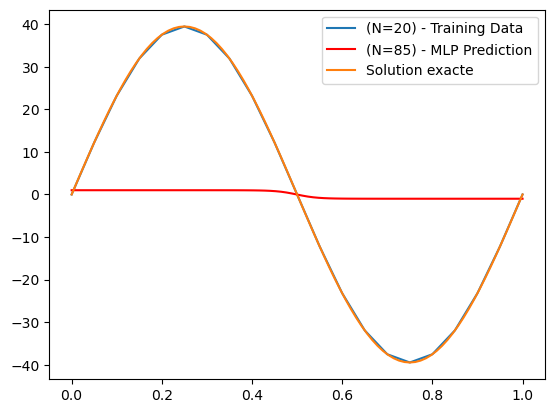

In [12]:
from torch.utils.data import TensorDataset, DataLoader
def generate_data(N):
    Mh = np.linspace(0, 1, N + 1)
    f = 4.0 * np.pi**2.0 * np.sin(2.0 * np.pi * Mh)
    return Mh, f

def solve_with_torch(N, epochs=5000, learning_rate=0.00004):
    Mh, f = generate_data(N)
    Mh = torch.tensor(Mh, dtype=torch.float32).unsqueeze(1) 
    f = torch.tensor(f, dtype=torch.float32).unsqueeze(1) 

    model = mlp([1, 20, 20, 20, 1])  # 1 entrée, 3 couches cachées de 20 neurones chacune, 1 sortie

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        optimizer.zero_grad()  
        y_pred = model(Mh) 
        loss = criterion(y_pred, f) 
        loss.backward()  
        optimizer.step() 

        if epoch % 100 == 0:  
            print(f'Epoch {epoch}/{epochs} - Loss: {loss.item()}')

   
    Mh_test = torch.linspace(0, 1, 85).unsqueeze(1)  
    pred = model(Mh_test).detach().numpy()  

    return Mh_test.numpy(), pred, f.detach().numpy(), Mh.numpy()

N = 20
Mh_test, pred, f_train, Mh_train = solve_with_torch(N)
Mh_exact = np.linspace(0, 1, 85)
exact_solution = 4.0 * np.pi ** 2.0 * np.sin(2.0 * np.pi * Mh_exact)


plt.plot(Mh_train, f_train, label='(N=20) - Training Data')
plt.plot(Mh_test, pred, color='red', label='(N=85) - MLP Prediction')
plt.plot(Mh_exact, exact_solution, label='Solution exacte')
plt.legend()
plt.show()

### Exercice 3

On se propose d'étudier la propagation d'incertitude.

On suppose qu'on ne connait pas exactement f mais qu'on connait deux choses:
- des valeurs ponctuelles de $f$
- la régularité de $f$

On voudrait propager l'incertitude qu'on a sur $f$ (qui suit une loi $P$) et connaitre celle qu'on a sur $u$

Pour cela, on suppose qu'on peut échantillonner des fonctions $f$ aux points de mesures.
On pose $\mathbf{f}=(f^1,...,f^m)$ un membre de droite qui évalue une fonction $f$ aux $m$ points de mesures.

On note $\mathbf{f}_i$ un échantillon aléatoire de $P$.
Si on résout avec notre schéma aux différence finis le problème associé à $\mathbf{f}_i$ on
obtient $\mathbf{u}_i$.

A l'aide d'estimateur empirique on peut construire la moyenne et la variance de la loi sur les solutions $u$
avec

$$
E[u]=\frac{1}{n}\sum_{i=1}^n\mathbf{u}_i, \quad Var(u)=\frac{1}{n}\sum_{i=1}^n(\mathbf{u}_i-E[u])^2
$$

On veut donc tracer l'incertitude sur $u$. Pour cela on va tracer
$E[u]$ et l'ecart type $\sigma=\sqrt{Var(U)}$ avec

'''
    ## code pour afficher moyenne et ecart type
    
    plt.plot(X, mean_prediction, label="Mean prediction")
    plt.fill_between(
        X.ravel(),
        mean_prediction - 1.96 * std_prediction,
        mean_prediction + 1.96 * std_prediction,
        alpha=0.5,
        label=r"95% confidence interval",
    )
'''

Maintenant il reste a construire la loi de $f$ nommé $P$

Pour cela on va choisir un processus Gaussien qui va échantillonner des fonctions de régularité donnée.
Puis on va le contraindre par des données.

Pour cela:
- on choisira $m$ points $(x_1,sin(x_1)+\epsilon_1,...,x_m,sin(x_m)+\epsilon_m)$,
- on "fitera" le processus Gaussien,
- on échantillonnera $n$ sources,
- on calcul les $n$ solutions,
- on calcul la loi de $u$,
- on affiche le résultat.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch 


class systeme:
    def __init__(self,n=1,H = None,dH_dp = None,dH_dq= None):
        self.n = n
        self.H = H
        self.dH_dp = dH_dp
        self.dH_dq = dH_dq


class EulerExplicit:
    def __init__(self,sys=None):
        self.p = []
        self.q = []
        self.H = []
        self.sys = sys

    def initial_condition(self,po,q0):
        self.p.append(po)
        self.q.append(q0)
    
    def oneTimeStep(self,dt):
        dH_dq_n = self.sys.dH_dq(self.q[-1],self.p[-1])
        dH_dp_n = self.sys.dH_dp(self.q[-1],self.p[-1])
        qn1  =  self.q[-1]+dt*dH_dq_n 
        pn1 =   self.p[-1] + dt*dH_dp_n
        self.q.append(qn1)
        self.p.append(pn1)
        pass
    
    def loopTime(self):
        pass 
    
    def plot(self):